In [1]:
# Importing Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Source Dataframes

calender = pd.read_csv('calendar.csv')
hosts = pd.read_csv('hosts.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
# Look at the table Calendar how many rows and unique listing ids are present?
# Are there any implications when it comes to having more rows and less unique listing ids? 

calender.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [4]:
# Checking the data types

calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [5]:
# checking if any null values is present in the target variable

calender['date'] = pd.to_datetime(calender['date'])
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   calender_id     319192 non-null  int64         
 1   listing_id      319192 non-null  int64         
 2   date            319192 non-null  datetime64[ns]
 3   available       319192 non-null  int64         
 4   price           319117 non-null  float64       
 5   adjusted_price  319117 non-null  float64       
 6   minimum_nights  319192 non-null  int64         
 7   maximum_nights  319192 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 19.5 MB


In [6]:
# checking the calender table after the transformed date column

calender.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,0,56.0,56.0,3,5
1,2,22742449,2022-11-13,1,95.0,95.0,2,99
2,3,34621717,2022-04-17,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21,0,100.0,100.0,2,1125


In [7]:
# Checking dimentions

calender.shape

(319192, 8)

In [8]:
# checking unique number of listing ids

calender['listing_id'].nunique()

1749

In [9]:
# Here in this scenario it can be seen that compared to number of rows (319192) the unique nos of listing id (1749) is very less
# Also, we can say that during the calender year on an average number of visit per listing was 319192/1749 = 182

In [10]:
# Look at the price column in Calendar table. 
# What transformations you will need to perform so that you can create a column that can be used as a target/response variable?

calender.isnull().sum()

calender_id        0
listing_id         0
date               0
available          0
price             75
adjusted_price    75
minimum_nights     0
maximum_nights     0
dtype: int64

In [11]:
# imputing the nul values in the price column

calender['price'].fillna(calender['price'].mean(),inplace=True)
calender['price'].isnull().sum()

0

In [12]:
# Look at the tables Listings, Hosts and Reviews to come up with a list of potential transformations needed 
# in order to have predictors that can be used to predict the listing price. 

listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [13]:
# checking the listing table datatype

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [14]:
# checking if any null values are present

listings.isnull().sum()

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

In [15]:
# imputing null values in the columns which are protential predictor variables in the model

listings['bedrooms'].fillna(listings['bedrooms'].mean(),inplace=True)
listings['beds'].fillna(listings['beds'].mean(),inplace=True)
listings.isnull().sum()

listing_id         0
listing_url        0
name               0
description       70
latitude           0
longitude          0
property_type      0
room_type          0
accomodates        0
bathrooms_text     0
bedrooms           0
beds               0
amenities          0
host_id            0
dtype: int64

In [16]:
# changing Datatypes for few columns like beds and bedrooms

listings['beds'] = listings['beds'].astype(int)
listings['bedrooms'] = listings['bedrooms'].astype(int)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1749 non-null   int32  
 11  beds            1749 non-null   int32  
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(2), int32(2), int64(3), object(7)
memory usage: 177.8+ KB


In [17]:
# renaming few columns which are incorrectly or mispelt

listings.rename(columns={'bathrooms_text':'bathrooms'},inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_id     1749 non-null   int64  
 1   listing_url    1749 non-null   object 
 2   name           1749 non-null   object 
 3   description    1679 non-null   object 
 4   latitude       1749 non-null   float64
 5   longitude      1749 non-null   float64
 6   property_type  1749 non-null   object 
 7   room_type      1749 non-null   object 
 8   accomodates    1749 non-null   int64  
 9   bathrooms      1749 non-null   object 
 10  bedrooms       1749 non-null   int32  
 11  beds           1749 non-null   int32  
 12  amenities      1749 non-null   object 
 13  host_id        1749 non-null   int64  
dtypes: float64(2), int32(2), int64(3), object(7)
memory usage: 177.8+ KB


In [18]:
# looking at hosts data

hosts.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [19]:
# checking the data type

hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [20]:
# changing date data type to datetime

hosts['host_since'] = pd.to_datetime(hosts['host_since'])
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_id        1111 non-null   int64         
 1   host_name      1111 non-null   object        
 2   host_since     1111 non-null   datetime64[ns]
 3   host_location  1108 non-null   object        
 4   host_about     490 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 43.5+ KB


In [21]:
# rechecking after dtype transformation

hosts.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [22]:
# Checking reviews Data

reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [23]:
# Checking data type

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62923 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [24]:
# changing date time format

reviews['date'] = pd.to_datetime(reviews['date'])
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   review_id      62987 non-null  int64         
 1   listing_id     62987 non-null  int64         
 2   date           62987 non-null  datetime64[ns]
 3   reviewer_id    62987 non-null  int64         
 4   reviewer_name  62987 non-null  object        
 5   comments       62923 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.9+ MB


In [25]:
# crosschecking

reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...


In [26]:
# Create an aggregated view of data spread across different tables, containing the target as well as predictor variables. 

listings_sub = listings[['listing_id','property_type','room_type','accomodates','bathrooms','bedrooms','beds','host_id']]
calender_sub = calender[['listing_id', 'date', 'available', 'price']]
hosts_sub = hosts[['host_id','host_since']]
reviews_sub = reviews[['review_id','listing_id','date','reviewer_id']]

In [27]:
# removing unnecessary columns

listings_sub.head()

,listing_id,property_type,room_type,accomodates,bathrooms,bedrooms,beds,host_id
0,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077
1,116134,Entire rental unit,Entire home/apt,4,2.5 baths,2,2,586942
2,218916,Entire condominium (condo),Entire home/apt,5,1 bath,1,3,915664
3,224333,Private room in residential home,Private room,2,2 shared baths,1,1,1167377
4,224682,Entire rental unit,Entire home/apt,3,1 bath,1,2,1263933


In [28]:
# removing unnecessary columns

calender_sub.head()

,listing_id,date,available,price
0,40334325,2022-08-03,0,56.0
1,22742449,2022-11-13,1,95.0
2,34621717,2022-04-17,0,75.0
3,38281744,2022-01-31,1,150.0
4,18835003,2022-05-21,0,100.0


In [29]:
# removing unnecessary columns

hosts_sub.head()

,host_id,host_since
0,234077,2010-09-14
1,334804,2011-01-04
2,413052,2011-02-27
3,452791,2011-03-20
4,462975,2011-03-25


In [30]:
# removing unnecessary columns

reviews_sub.head()

,review_id,listing_id,date,reviewer_id
0,1,50904,2015-05-06,19482395
1,2,50904,2021-10-10,333559
2,3,116134,2012-03-05,928644
3,4,116134,2012-05-25,231288
4,5,116134,2013-09-03,7984251


In [31]:
# merging the different data sources to a single one for our analysis

merged = pd.merge(listings_sub, calender_sub, on='listing_id')
merged = pd.merge(merged, hosts_sub, on='host_id')
merged.head()

,listing_id,property_type,room_type,accomodates,bathrooms,bedrooms,beds,host_id,date,available,price,host_since
0,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-06-23,1,165.0,2010-09-14
1,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-01-16,1,150.0,2010-09-14
2,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-05-17,1,165.0,2010-09-14
3,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-05-31,1,165.0,2010-09-14
4,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-10-20,0,165.0,2010-09-14


In [32]:
# checking dimentions

merged.shape

(319192, 12)

In [33]:
# checking data types

merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319192 entries, 0 to 319191
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     319192 non-null  int64         
 1   property_type  319192 non-null  object        
 2   room_type      319192 non-null  object        
 3   accomodates    319192 non-null  int64         
 4   bathrooms      319192 non-null  object        
 5   bedrooms       319192 non-null  int32         
 6   beds           319192 non-null  int32         
 7   host_id        319192 non-null  int64         
 8   date           319192 non-null  datetime64[ns]
 9   available      319192 non-null  int64         
 10  price          319192 non-null  float64       
 11  host_since     319192 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(2), int64(4), object(3)
memory usage: 29.2+ MB


# EDA

In [34]:
# checking all the parameters for quantitative features

merged.describe()

,listing_id,accomodates,bedrooms,beds,host_id,available,price
count,3.191920e+05,319192.000000,319192.000000,319192.000000,3.191920e+05,319192.000000,319192.000000
mean,3.488528e+07,3.762619,1.490285,2.217599,1.418691e+08,0.535192,109.917779
std,1.523257e+07,2.771459,1.065670,2.222932,1.287545e+08,0.498761,185.769339
min,5.090400e+04,1.000000,1.000000,1.000000,2.340770e+05,0.000000,13.000000
25%,2.338661e+07,2.000000,1.000000,1.000000,2.875771e+07,0.000000,59.000000
50%,3.891969e+07,3.000000,1.000000,2.000000,1.033579e+08,1.000000,79.000000
75%,4.839174e+07,4.000000,2.000000,3.000000,2.354916e+08,1.000000,115.000000
max,5.398332e+07,16.000000,20.000000,44.000000,4.373093e+08,1.000000,5800.000000


In [35]:
# cross checking any null values

merged.isnull().sum()

listing_id       0
property_type    0
room_type        0
accomodates      0
bathrooms        0
bedrooms         0
beds             0
host_id          0
date             0
available        0
price            0
host_since       0
dtype: int64

In [36]:
# Top 10 Property Types

top_property_types = merged['property_type'].value_counts().nlargest(10).index
filtered_df = merged[merged['property_type'].isin(top_property_types)]

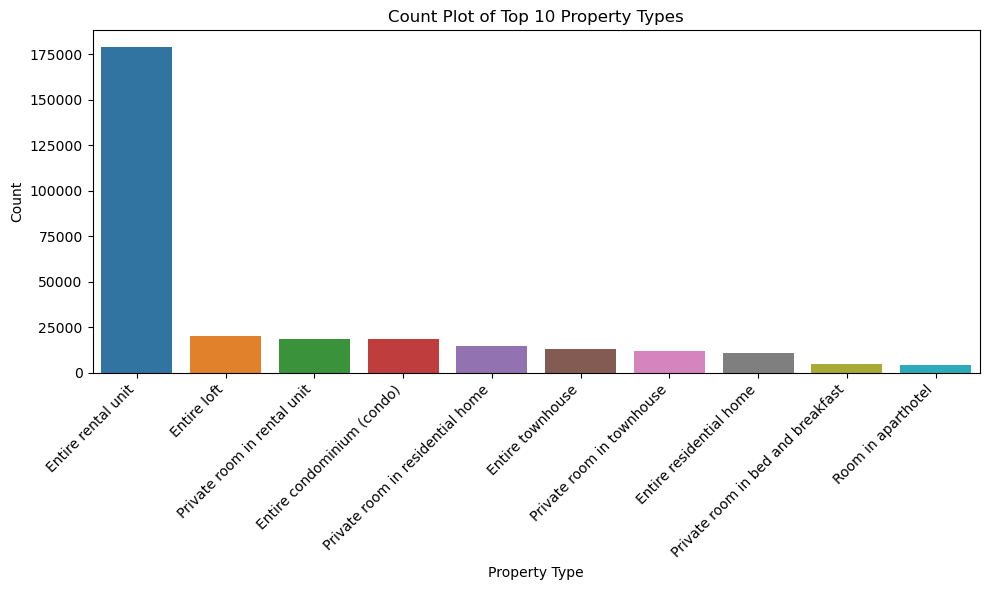

In [37]:
# Visualizing 

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='property_type', order=top_property_types)
plt.title('Count Plot of Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

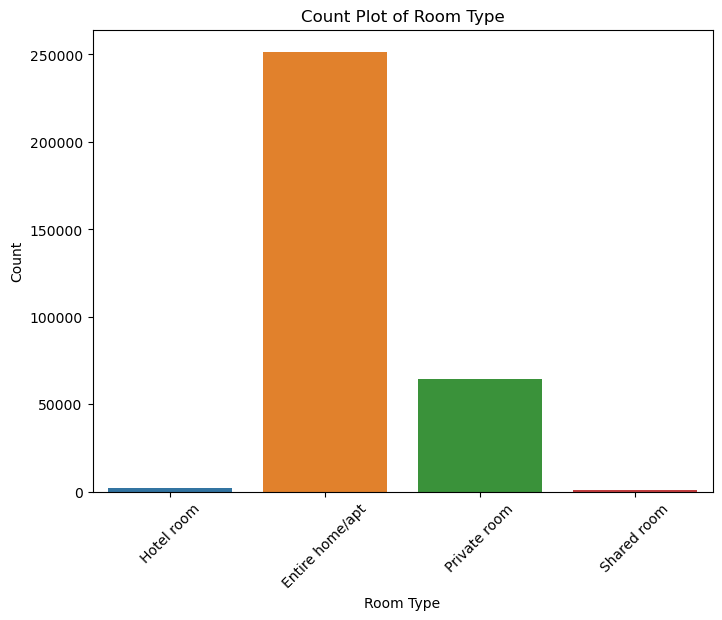

In [38]:
# visualizing the distribution of room types

plt.figure(figsize=(8, 6))
sns.countplot(data=merged, x='room_type')
plt.title('Count Plot of Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

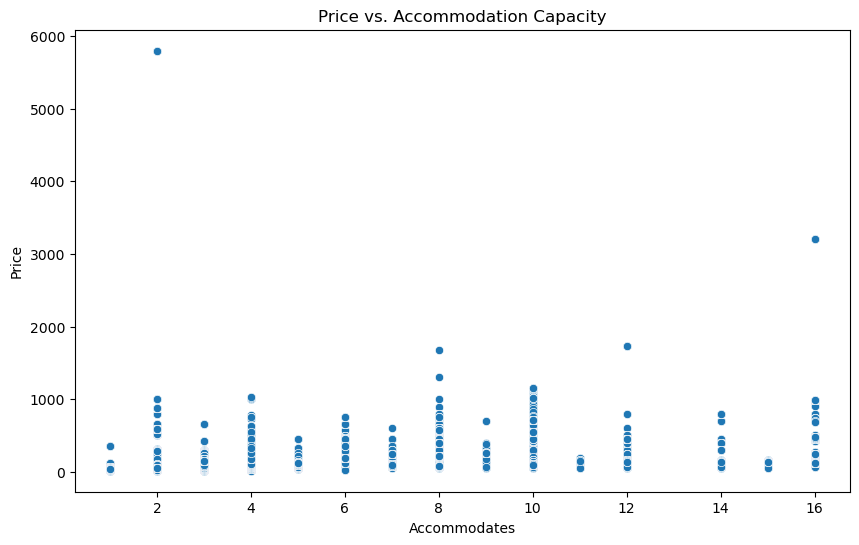

In [39]:
# Visualizing the correlation between price and accomodation capacity

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='accomodates', y='price')
plt.title('Price vs. Accommodation Capacity')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

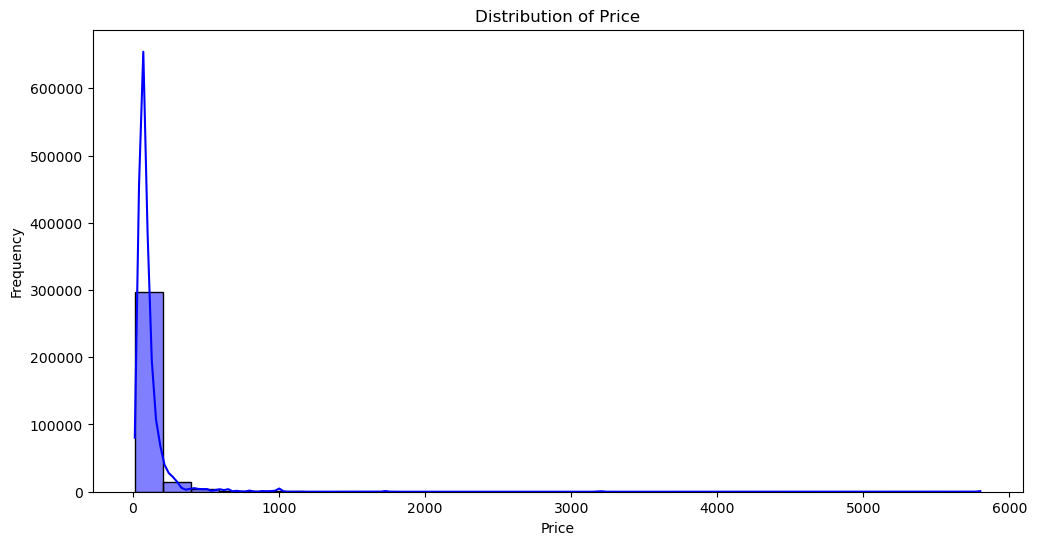

In [40]:
# Visualizing the distribution of price

plt.figure(figsize=(12, 6))
sns.histplot(merged['price'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

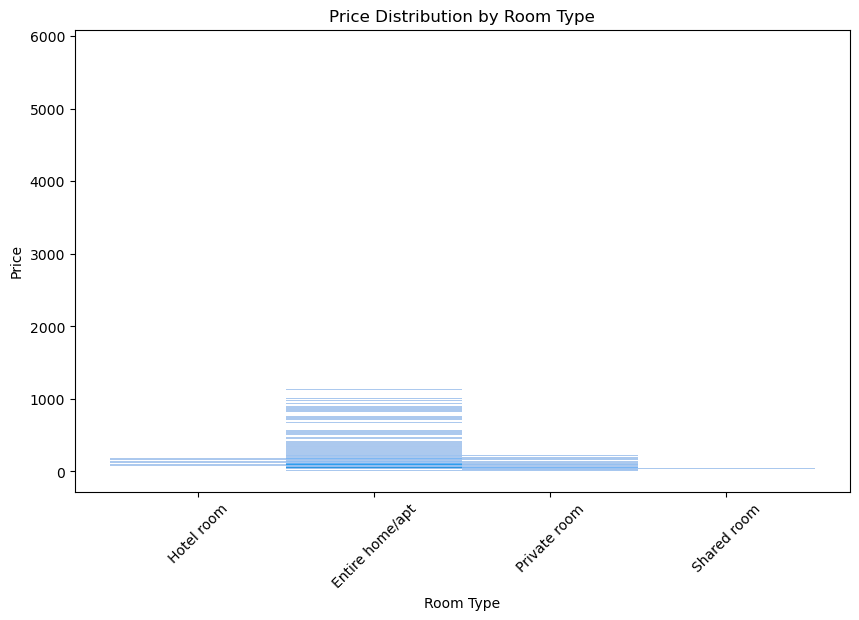

In [41]:
# visualizing the price distribution based on different room types

plt.figure(figsize=(10, 6))
sns.histplot(data=merged, x='room_type', y='price')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

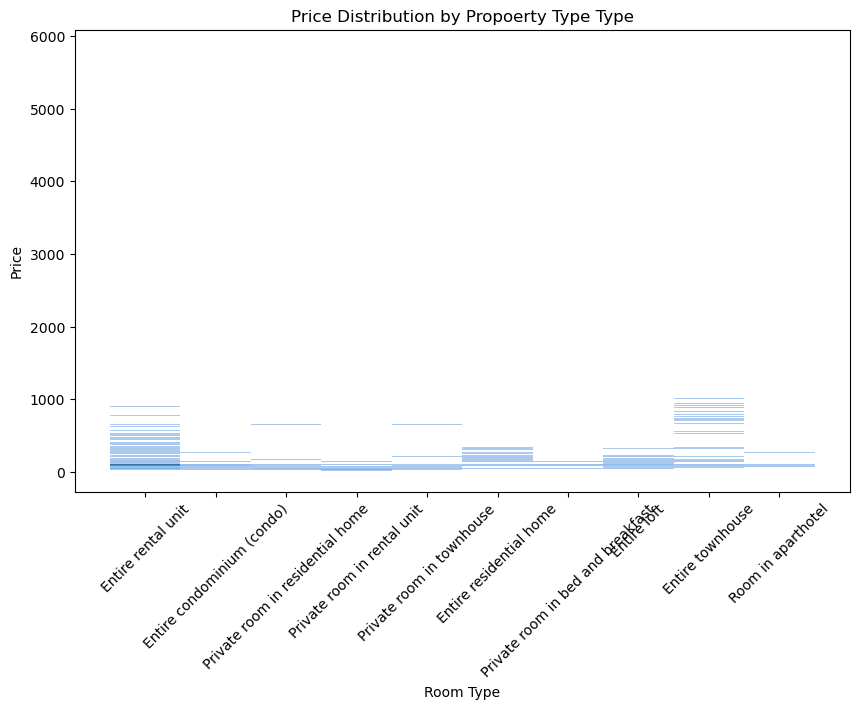

In [42]:
# visualizing the price distribution based on different property types

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='property_type', y='price')
plt.title('Price Distribution by Propoerty Type Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [43]:
# filtering out fields for correlation study

filtered_merged = merged[['property_type','room_type','accomodates','bathrooms','bedrooms','beds','price']]

C:\Users\Pratik\AppData\Local\Temp\ipykernel_7408\1181963930.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_merged.corr()


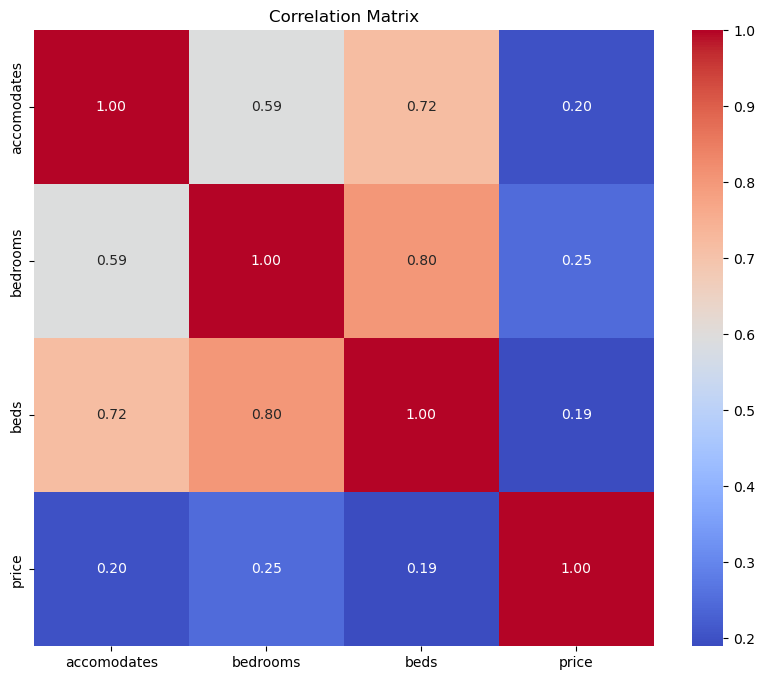

In [44]:
# visualizing the correlation with HeatMap

correlation_matrix = filtered_merged.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [45]:
# Looking at the final data before trying to build a model

merged

,listing_id,property_type,room_type,accomodates,bathrooms,bedrooms,beds,host_id,date,available,price,host_since
0,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-06-23,1,165.0,2010-09-14
1,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-01-16,1,150.0,2010-09-14
2,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-05-17,1,165.0,2010-09-14
3,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-05-31,1,165.0,2010-09-14
4,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-10-20,0,165.0,2010-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...
319187,53983318,Entire rental unit,Entire home/apt,3,1.5 baths,1,1,437309332,2022-09-09,1,150.0,2021-12-24
319188,53983318,Entire rental unit,Entire home/apt,3,1.5 baths,1,1,437309332,2022-08-27,1,150.0,2021-12-24
319189,53983318,Entire rental unit,Entire home/apt,3,1.5 baths,1,1,437309332,2022-03-22,1,150.0,2021-12-24
319190,53983318,Entire rental unit,Entire home/apt,3,1.5 baths,1,1,437309332,2022-07-30,1,150.0,2021-12-24


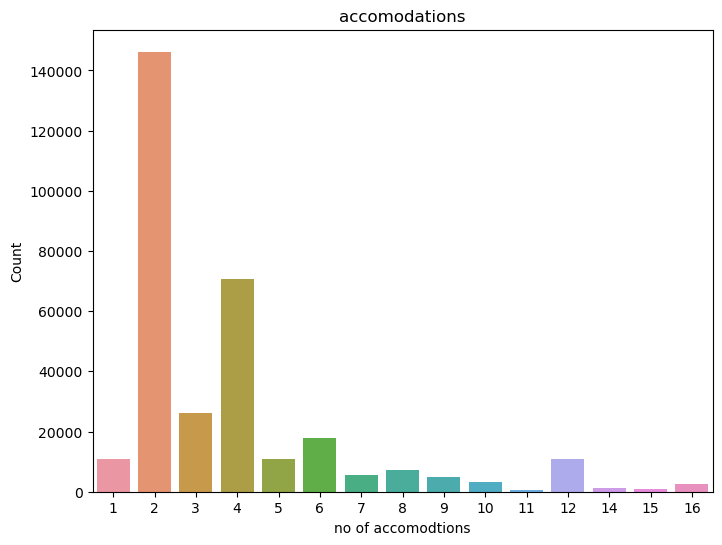

In [46]:
# Distribution of different accomodatoion types

plt.figure(figsize=(8, 6))
sns.countplot(data=merged, x='accomodates')
plt.title('accomodations')
plt.xlabel('no of accomodtions')
plt.ylabel('Count')
plt.show()

In [47]:
# Top 10 Bathroom Types

top_bathroom_types = merged['bathrooms'].value_counts().nlargest(10).index
filtered_bathroom = merged[merged['bathrooms'].isin(top_bathroom_types)]

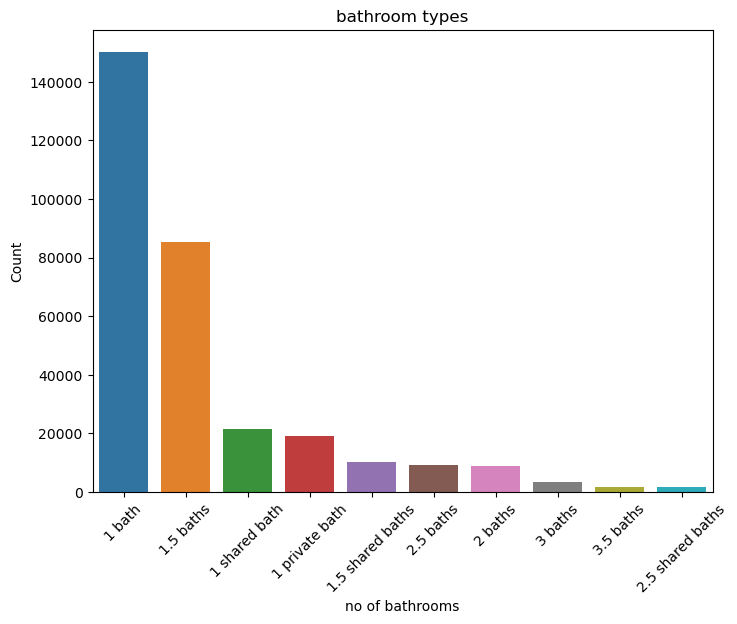

In [48]:
# Visualizing the Distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_bathroom, x='bathrooms', order=top_bathroom_types)
plt.title('bathroom types')
plt.xlabel('no of bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

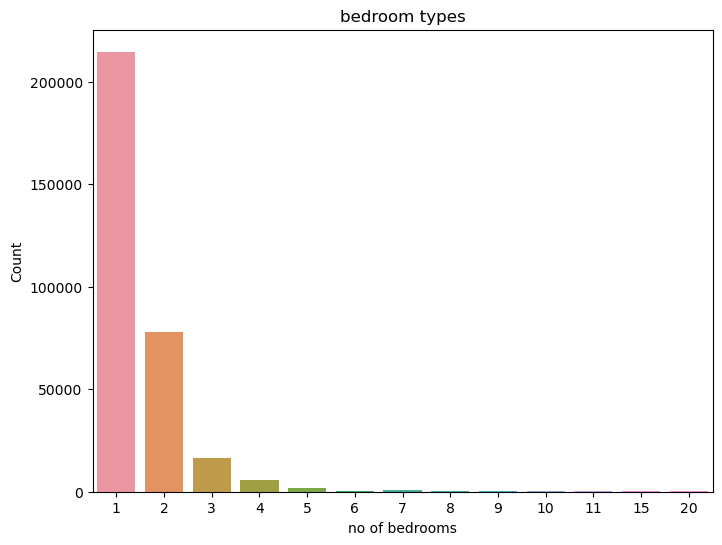

In [49]:
# Visualizing different bedroom types

plt.figure(figsize=(8, 6))
sns.countplot(data=merged, x='bedrooms')
plt.title('bedroom types')
plt.xlabel('no of bedrooms')
plt.ylabel('Count')
plt.show()

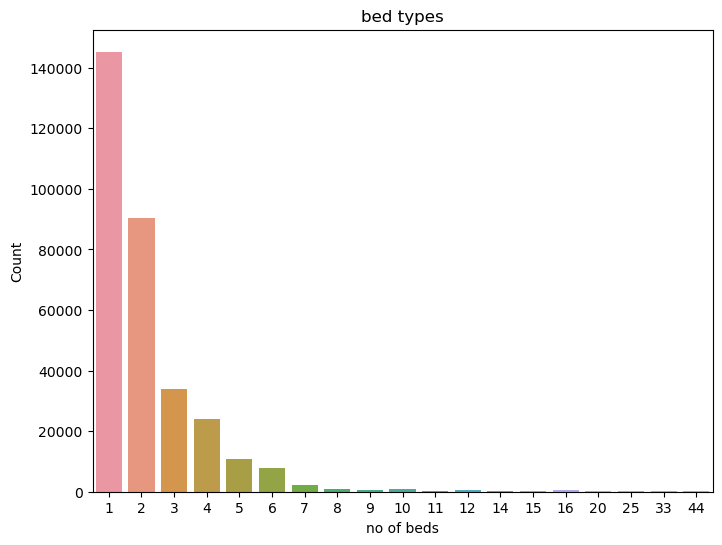

In [50]:
# Visualizing different bed types

plt.figure(figsize=(8, 6))
sns.countplot(data=merged, x='beds')
plt.title('bed types')
plt.xlabel('no of beds')
plt.ylabel('Count')
plt.show()

# Additional EDA befroe Model Building

In [51]:
# Looking at the final Dataframe

df = merged
df

,listing_id,property_type,room_type,accomodates,bathrooms,bedrooms,beds,host_id,date,available,price,host_since
0,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-06-23,1,165.0,2010-09-14
1,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-01-16,1,150.0,2010-09-14
2,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-05-17,1,165.0,2010-09-14
3,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-05-31,1,165.0,2010-09-14
4,50904,Room in boutique hotel,Hotel room,2,1 private bath,1,1,234077,2022-10-20,0,165.0,2010-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...
319187,53983318,Entire rental unit,Entire home/apt,3,1.5 baths,1,1,437309332,2022-09-09,1,150.0,2021-12-24
319188,53983318,Entire rental unit,Entire home/apt,3,1.5 baths,1,1,437309332,2022-08-27,1,150.0,2021-12-24
319189,53983318,Entire rental unit,Entire home/apt,3,1.5 baths,1,1,437309332,2022-03-22,1,150.0,2021-12-24
319190,53983318,Entire rental unit,Entire home/apt,3,1.5 baths,1,1,437309332,2022-07-30,1,150.0,2021-12-24


In [52]:
# CHecking Dimentions

df.shape

(319192, 12)

In [53]:
# Revisiting Columns

df.columns

Index(['listing_id', 'property_type', 'room_type', 'accomodates', 'bathrooms',
       'bedrooms', 'beds', 'host_id', 'date', 'available', 'price',
       'host_since'],
      dtype='object')

In [54]:
# Numeric Parameters

df.describe()

,listing_id,accomodates,bedrooms,beds,host_id,available,price
count,3.191920e+05,319192.000000,319192.000000,319192.000000,3.191920e+05,319192.000000,319192.000000
mean,3.488528e+07,3.762619,1.490285,2.217599,1.418691e+08,0.535192,109.917779
std,1.523257e+07,2.771459,1.065670,2.222932,1.287545e+08,0.498761,185.769339
min,5.090400e+04,1.000000,1.000000,1.000000,2.340770e+05,0.000000,13.000000
25%,2.338661e+07,2.000000,1.000000,1.000000,2.875771e+07,0.000000,59.000000
50%,3.891969e+07,3.000000,1.000000,2.000000,1.033579e+08,1.000000,79.000000
75%,4.839174e+07,4.000000,2.000000,3.000000,2.354916e+08,1.000000,115.000000
max,5.398332e+07,16.000000,20.000000,44.000000,4.373093e+08,1.000000,5800.000000


In [55]:
# Data Types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319192 entries, 0 to 319191
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     319192 non-null  int64         
 1   property_type  319192 non-null  object        
 2   room_type      319192 non-null  object        
 3   accomodates    319192 non-null  int64         
 4   bathrooms      319192 non-null  object        
 5   bedrooms       319192 non-null  int32         
 6   beds           319192 non-null  int32         
 7   host_id        319192 non-null  int64         
 8   date           319192 non-null  datetime64[ns]
 9   available      319192 non-null  int64         
 10  price          319192 non-null  float64       
 11  host_since     319192 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(2), int64(4), object(3)
memory usage: 29.2+ MB


In [56]:
#Crosschecking 

df.dtypes

listing_id                int64
property_type            object
room_type                object
accomodates               int64
bathrooms                object
bedrooms                  int32
beds                      int32
host_id                   int64
date             datetime64[ns]
available                 int64
price                   float64
host_since       datetime64[ns]
dtype: object

In [57]:
# Missing Values

df.isnull().sum()

listing_id       0
property_type    0
room_type        0
accomodates      0
bathrooms        0
bedrooms         0
beds             0
host_id          0
date             0
available        0
price            0
host_since       0
dtype: int64

In [58]:
# Checking Value Counts for all the fields

for i in df.columns:
    
    print(df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")

46810177    209
2347414     208
42635704    208
36963032    208
53916524    207
           ... 
48625982    156
50254843    155
30414744    153
52014982    151
20781256    151
Name: listing_id, Length: 1749, dtype: int64 

---------------------------------------------------------------
Entire rental unit                     179150
Entire loft                             20112
Private room in rental unit             18728
Entire condominium (condo)              18599
Private room in residential home        14657
Entire townhouse                        12918
Private room in townhouse               12014
Entire residential home                 10738
Private room in bed and breakfast        4963
Room in aparthotel                       4448
Entire serviced apartment                4364
Room in boutique hotel                   4165
Private room in condominium (condo)      2342
Room in hotel                            2192
Entire guest suite                       1129
Private room in loft   

In [59]:
# Missing Value Final Confirmation

for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))

C:\Users\Pratik\AppData\Local\Temp\ipykernel_7408\205757043.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bedrooms"])


<Axes: xlabel='bedrooms', ylabel='Density'>

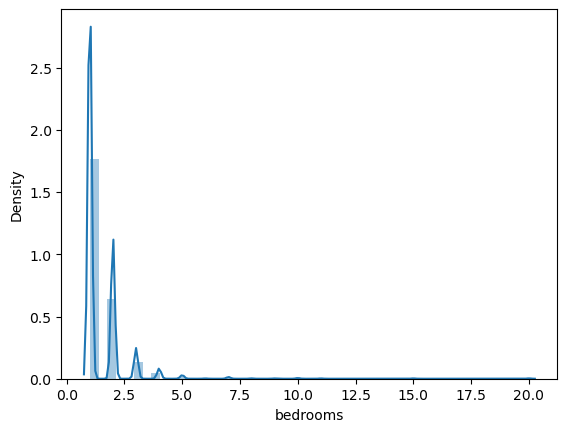

In [60]:
# Crosschecking Distribution of Bedrooms

sns.distplot(df["bedrooms"])

C:\Users\Pratik\AppData\Local\Temp\ipykernel_7408\2995474725.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["beds"])


<Axes: xlabel='beds', ylabel='Density'>

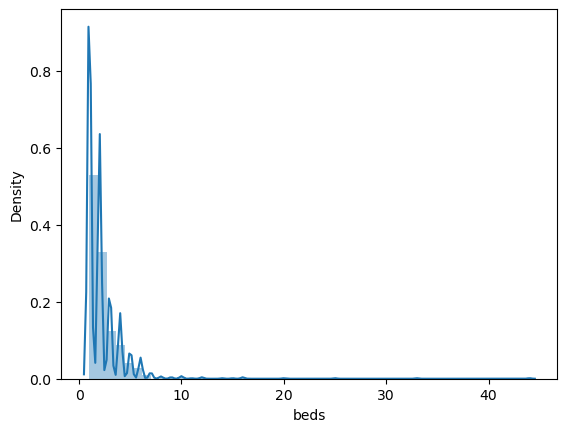

In [61]:
# Crosschecking Distribution of Beds

sns.distplot(df["beds"])

C:\Users\Pratik\AppData\Local\Temp\ipykernel_7408\3197201156.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["accomodates"])


<Axes: xlabel='accomodates', ylabel='Density'>

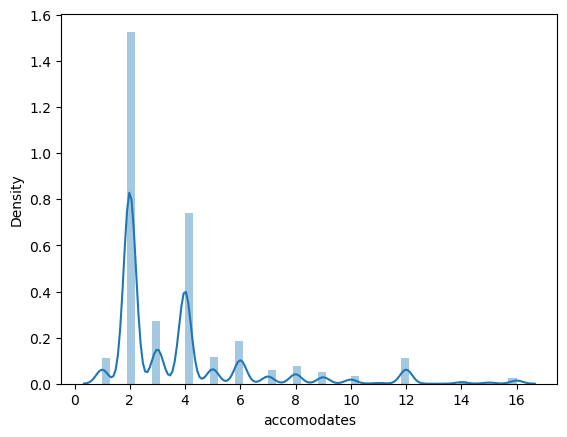

In [62]:
# Crosschecking Distribution of Different Accomodation Types

sns.distplot(df["accomodates"])

C:\Users\Pratik\AppData\Local\Temp\ipykernel_7408\307060868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


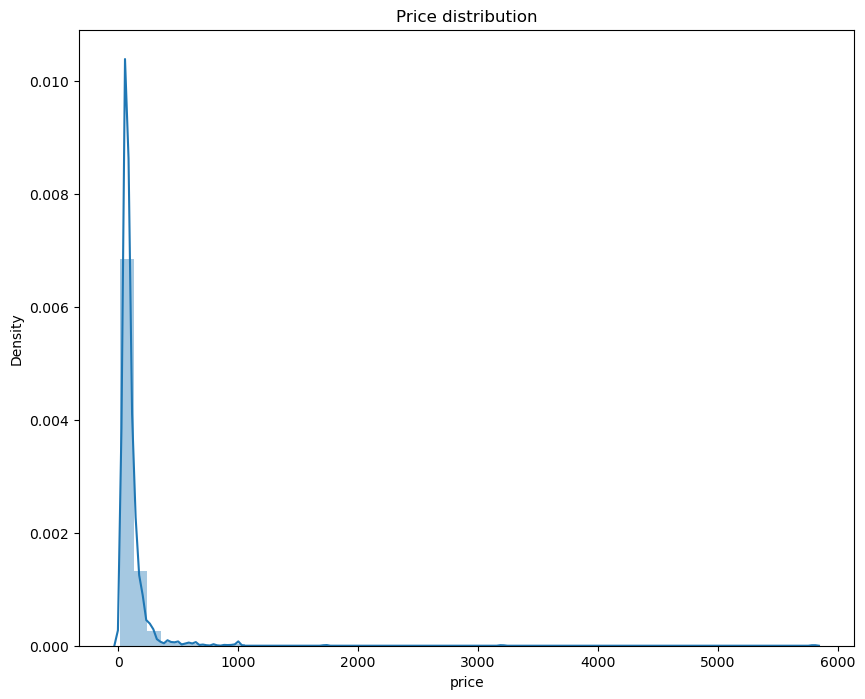

In [63]:
# Crosschecking Distribution of the target variable Price

plt.figure(figsize = (10, 8))
sns.distplot(df["price"])
plt.title('Price distribution')
plt.show()

In [64]:
# Dropping features that will not act as predictor variables

df = df.drop(['listing_id','host_id','date','available','host_since'], axis = 1)
df.head()

,property_type,room_type,accomodates,bathrooms,bedrooms,beds,price
0,Room in boutique hotel,Hotel room,2,1 private bath,1,1,165.0
1,Room in boutique hotel,Hotel room,2,1 private bath,1,1,150.0
2,Room in boutique hotel,Hotel room,2,1 private bath,1,1,165.0
3,Room in boutique hotel,Hotel room,2,1 private bath,1,1,165.0
4,Room in boutique hotel,Hotel room,2,1 private bath,1,1,165.0


In [65]:
# Segregating Categorical and numerical columns

categorical_col = []
numerical_col = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64" and df[column].dtypes != "int32":
        categorical_col.append(column)
    else:
        numerical_col.append(column)

In [66]:
# Checking Numerical Columns

numerical_col

['accomodates', 'bedrooms', 'beds', 'price']

In [67]:
# Checking CAtegorical Columns

categorical_col

['property_type', 'room_type', 'bathrooms']

In [68]:
# Importing necessary packages for encoding and modeling

from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [69]:
# Importing the Label Encoder 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
# Transforming the categorical columns into numeric values for them to be used as predictor variables

for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [71]:
# crosschecking the transformation

pd.set_option("display.max_columns",None)
df

,property_type,room_type,accomodates,bathrooms,bedrooms,beds,price
0,30,1,2,3,1,1,165.0
1,30,1,2,3,1,1,150.0
2,30,1,2,3,1,1,165.0
3,30,1,2,3,1,1,165.0
4,30,1,2,3,1,1,165.0
...,...,...,...,...,...,...,...
319187,8,0,3,5,1,1,150.0
319188,8,0,3,5,1,1,150.0
319189,8,0,3,5,1,1,150.0
319190,8,0,3,5,1,1,150.0


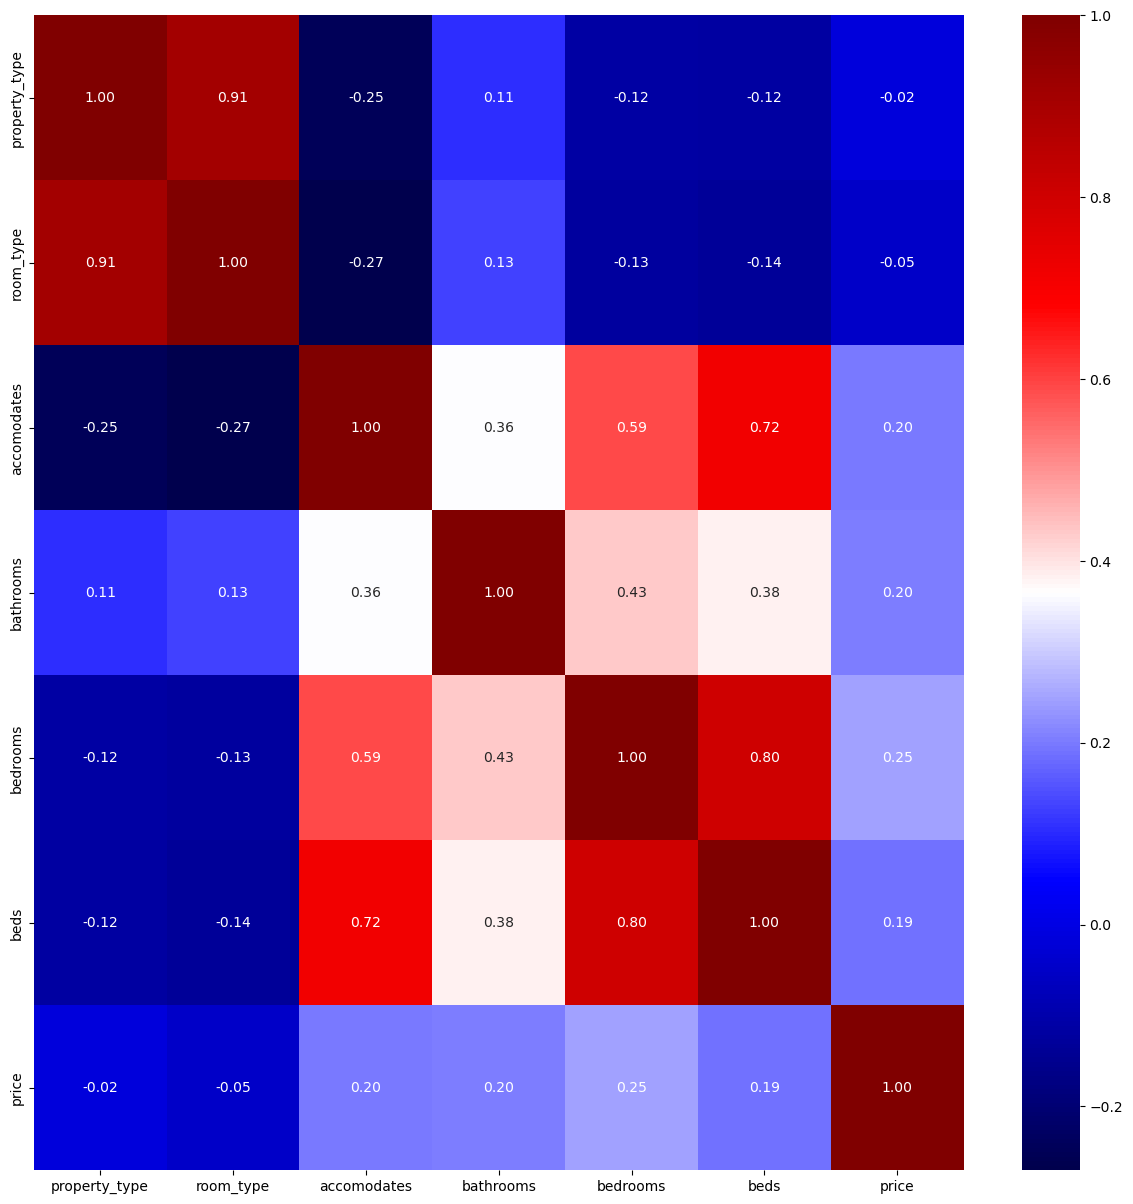

In [72]:
# Looking at the correlation after the encoding

plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [73]:
# Separating the Predictor and Target Variables

x = df.drop(["price"],axis = 1)
y = df.price

In [74]:
x

,property_type,room_type,accomodates,bathrooms,bedrooms,beds
0,30,1,2,3,1,1
1,30,1,2,3,1,1
2,30,1,2,3,1,1
3,30,1,2,3,1,1
4,30,1,2,3,1,1
...,...,...,...,...,...,...
319187,8,0,3,5,1,1
319188,8,0,3,5,1,1
319189,8,0,3,5,1,1
319190,8,0,3,5,1,1


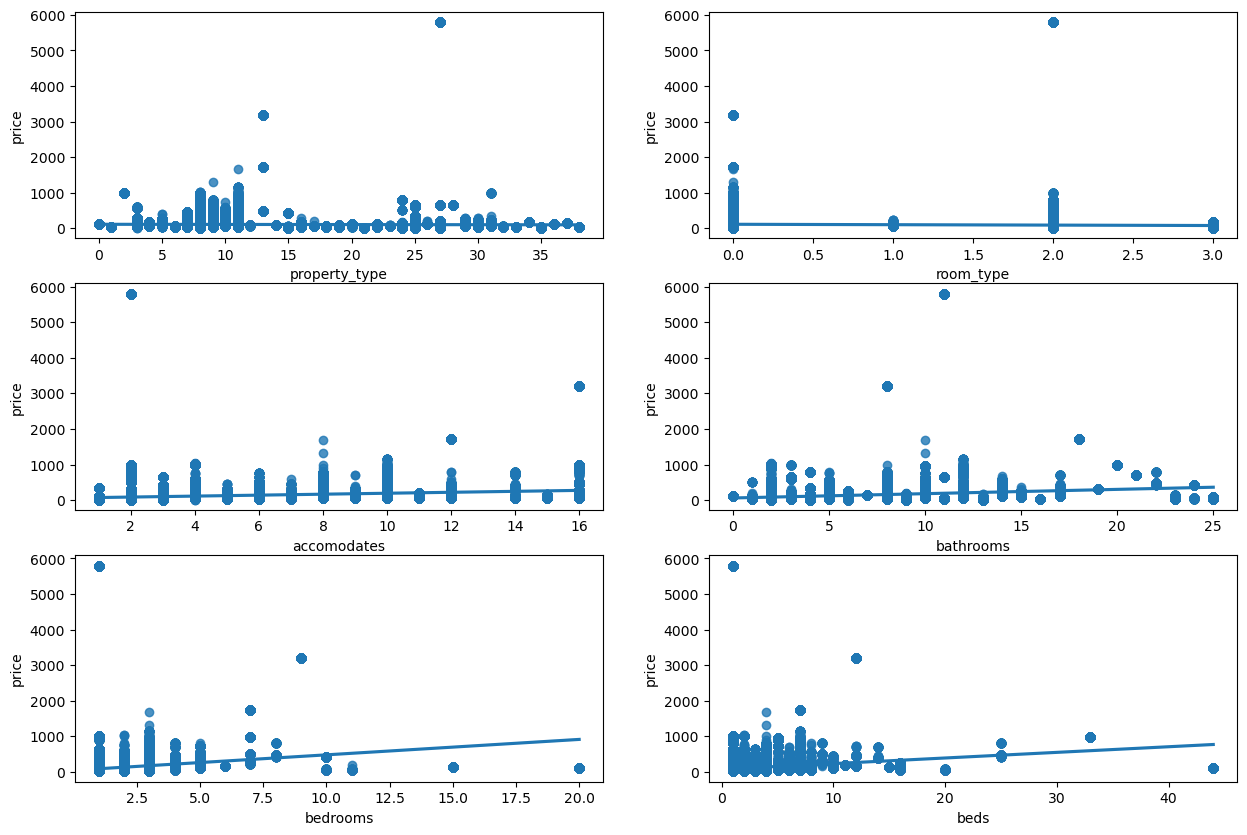

In [75]:
# using the seaborn package, plotting the regression for price with each one of the independent varaible post encoding

plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.regplot(x='property_type', y = 'price', data=df)

plt.subplot(3,2,2)
sns.regplot(x='room_type', y = 'price',data=df)

plt.subplot(3,2,3)
sns.regplot(x='accomodates', y = 'price',data=df)

plt.subplot(3,2,4)
sns.regplot(x='bathrooms', y = 'price',data=df)

plt.subplot(3,2,5)
sns.regplot(x='bedrooms', y = 'price',data=df)

plt.subplot(3,2,6)
sns.regplot(x='beds', y = 'price',data=df)

plt.show()

<Axes: xlabel='accomodates', ylabel='price'>

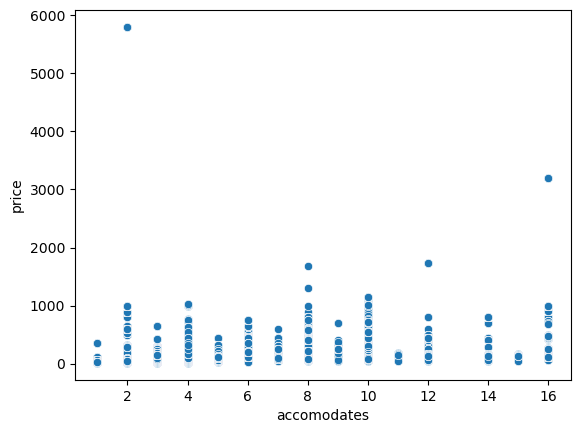

In [76]:
# Looking at the correlation between accomodates and Price after encoding

sns.scatterplot(x = x['accomodates'], y = y)

<Axes: xlabel='room_type', ylabel='price'>

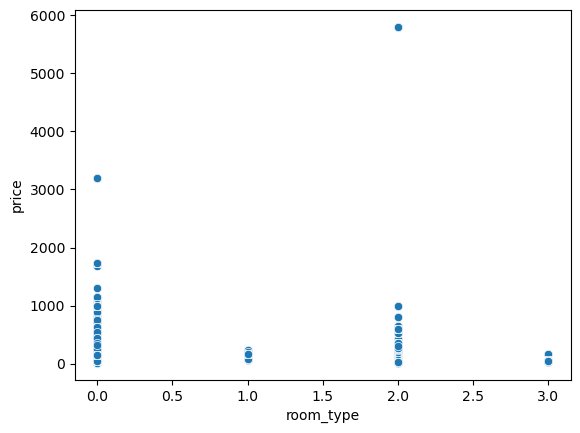

In [77]:
# Looking at the correlation between room type and Price after encoding

sns.scatterplot(x = x['room_type'], y = y)

<Axes: xlabel='property_type', ylabel='price'>

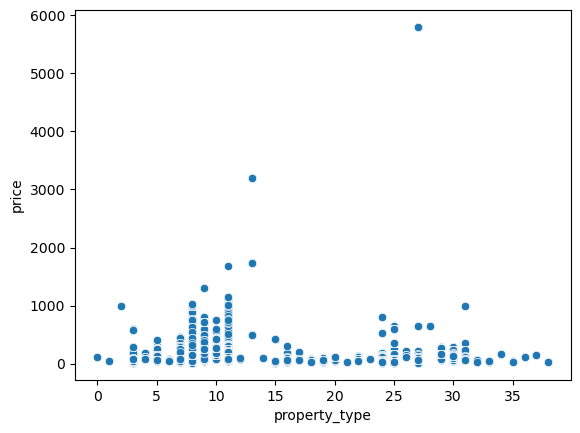

In [78]:
# Looking at the correlation between property type and Price after encoding

sns.scatterplot(x = x['property_type'], y = y)

In [79]:
# Splitting the Training and Testing Data 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

# Model Building

# Linear Regression

In [80]:
# Calling linear Regression

lr = LinearRegression()

In [81]:
# Fitting the data in the model and predicting

lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

In [82]:
# Checking diffent metrics of Linear Regression

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  56.35177899960983

Mean Squarred Error of Linear Regression     :  29617.176754340766

Root Mean Squarred Error of Linear Regression:  172.09641702935238

R2 Score of Linear Regression                :  0.08675436600826791


In [83]:
# Predicted Values

y_pred_lr

array([109.04384147,  94.87428821, 156.34889579, ..., 112.65987492,
       120.1538909 , 234.75913885])

In [84]:
# Actual Values

y_test

215626     49.0
298866    100.0
206919     49.0
318912    990.0
177144     45.0
          ...  
240494     95.0
98943      49.0
3809       93.0
59341     120.0
279237    100.0
Name: price, Length: 63839, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

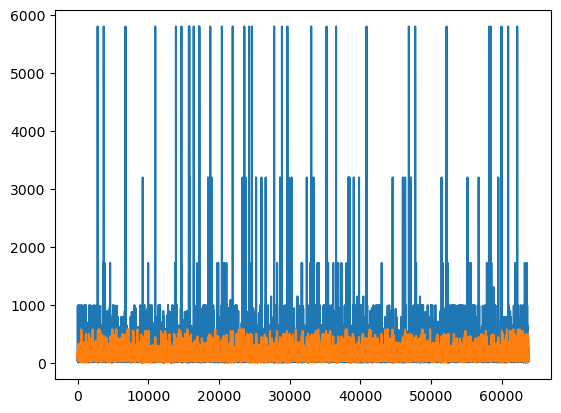

In [85]:
# Plotting the actual and predicted Data

x_range = [i for i in range(len(y_test))]
plt.plot(x_range, y_test)
plt.plot(x_range, y_pred_lr)
plt.show

# Random Forrest

In [86]:
# Calling Random Forrest

rf = RandomForestRegressor()

In [87]:
# Fitting the data in the model and predicting

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

In [88]:
# Checking diffent metrics of Random Forrest

mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  28.61770173221219

Mean Squarred Error of Random Forest Regressor     :  4258.9450301147135

Root Mean Squarred Error of Random Forest Regressor:  65.26059324059744

R2 Score of Random Forest Regressor                :  0.8686754316110499


In [89]:
# Predicted Data

y_pred_rf

array([ 86.80975306, 110.5541976 ,  79.49381312, ...,  97.99272628,
       102.35035173, 110.76716202])

In [90]:
# Actual Data

y_test

215626     49.0
298866    100.0
206919     49.0
318912    990.0
177144     45.0
          ...  
240494     95.0
98943      49.0
3809       93.0
59341     120.0
279237    100.0
Name: price, Length: 63839, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

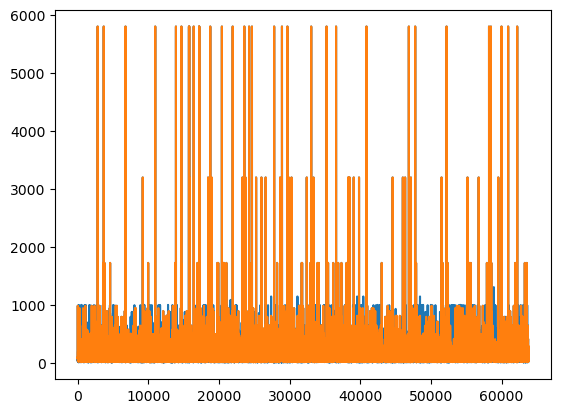

In [91]:
# Plotting the actual and predicted Data

plt.plot(x_range, y_test)
plt.plot(x_range, y_pred_rf)
plt.show

# XGBoost

In [92]:
# Calling XG Boot Regressor

from xgboost import XGBRegressor

In [93]:
# Setting the Objective as squared error

xgb = XGBRegressor(objective='reg:squarederror')

In [94]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [95]:
# Predicting the values

y_pred_xgb = xgb.predict(x_test)

In [96]:
# Checking diffent metrics of XG Boost

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  29.3864331487217

Mean Squarred Error of XGBoost Regressor     :  4278.851604455569

Root Mean Squarred Error of XGBoost Regressor:  65.41293147731241

R2 Score of XGBoost Regressor                :  0.8680616123987965


In [97]:
# Predicted Data

y_pred_xgb

array([ 83.33816 , 108.61694 ,  79.53758 , ...,  95.29269 , 103.53349 ,
       107.089836], dtype=float32)

In [98]:
# Actual Data

y_test

215626     49.0
298866    100.0
206919     49.0
318912    990.0
177144     45.0
          ...  
240494     95.0
98943      49.0
3809       93.0
59341     120.0
279237    100.0
Name: price, Length: 63839, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

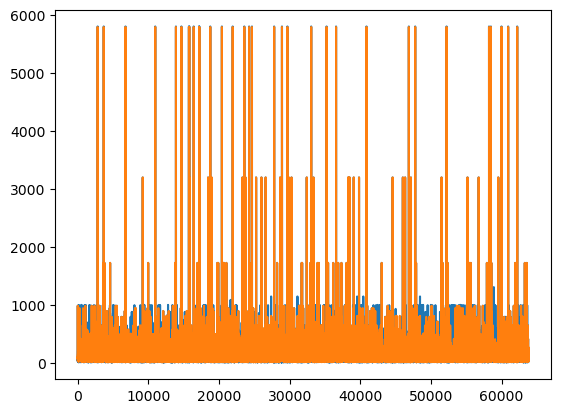

In [99]:
# Plotting the actual and predicted Data

plt.plot(x_range, y_test)
plt.plot(x_range, y_pred_xgb)
plt.show

In [100]:
df

,property_type,room_type,accomodates,bathrooms,bedrooms,beds,price
0,30,1,2,3,1,1,165.0
1,30,1,2,3,1,1,150.0
2,30,1,2,3,1,1,165.0
3,30,1,2,3,1,1,165.0
4,30,1,2,3,1,1,165.0
...,...,...,...,...,...,...,...
319187,8,0,3,5,1,1,150.0
319188,8,0,3,5,1,1,150.0
319189,8,0,3,5,1,1,150.0
319190,8,0,3,5,1,1,150.0
